In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from model_utils import *

In [2]:
train_X = np.loadtxt('train_x.csv', delimiter = ',')
train_Y = np.loadtxt('train_y.csv', delimiter = ',').reshape(1, train_X.shape[1])

test_X = np.loadtxt('test_x.csv', delimiter = ',')
test_Y = np.loadtxt('test_y.csv', delimiter = ',').reshape(1, test_X.shape[1])

In [3]:
print("Shape of train_X : ", train_X.shape)
print("Shape of train_Y : ", train_Y.shape)
print("Shape of test_X : ", test_X.shape)
print("Shape of test_Y : ", test_Y.shape)

Shape of train_X :  (2, 211)
Shape of train_Y :  (1, 211)
Shape of test_X :  (2, 200)
Shape of test_Y :  (1, 200)


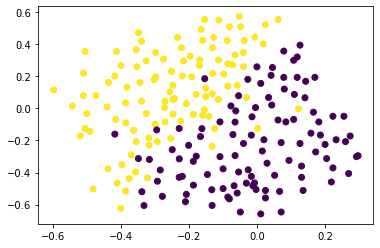

In [4]:
plt.scatter(train_X[0], train_X[1], c=train_Y[0])
plt.show()

# Model without Regularization

- Model layers like forward_propagation, cost_function, backward_propagation, update_parameters are imported from model_utils

In [5]:
def model(X, Y, layers_dims, learning_rate = 0.3, num_iterations = 30000):

    grads = {}
    cost_list = []                            
    m = X.shape[1]                        
    
    parameters = initialize_parameters(layers_dims)

    for i in range(0, num_iterations):

        a3, cache = forward_propagation(X, parameters)
    
        cost = cost_function(a3, Y)

        grads = backward_propagation(X, Y, cache)
        
        parameters = update_parameters(parameters, grads, learning_rate)
        
        if (i%1000 == 0):
            print("Cost after iteration ", i, " is : ", cost)
            cost_list.append(cost)
    
    # plot the cost
    plt.plot(cost_list)
    plt.ylabel('cost')
    plt.xlabel('iterations')
    plt.show()
    
    return parameters

Cost after iteration  0  is :  0.695492074816334
Cost after iteration  1000  is :  0.20184182115796884
Cost after iteration  2000  is :  0.18441223013086183
Cost after iteration  3000  is :  0.17136594618276035
Cost after iteration  4000  is :  0.16284851751502252
Cost after iteration  5000  is :  0.15486320179660168
Cost after iteration  6000  is :  0.13690360735869742
Cost after iteration  7000  is :  0.10807316093192477
Cost after iteration  8000  is :  0.10219472508514799
Cost after iteration  9000  is :  0.11301170620779838


C:\Users\JAIMIN\Desktop\Regularization Dataset\model_utils.py:59: RuntimeWarning: divide by zero encountered in log
  cost = - 1./m * np.sum(Y*np.log(A3) + (1 - Y)*(np.log(1 - A3)))
C:\Users\JAIMIN\Desktop\Regularization Dataset\model_utils.py:59: RuntimeWarning: invalid value encountered in multiply
  cost = - 1./m * np.sum(Y*np.log(A3) + (1 - Y)*(np.log(1 - A3)))


Cost after iteration  10000  is :  0.10185215781779576
Cost after iteration  11000  is :  0.06977632147370241
Cost after iteration  12000  is :  nan
Cost after iteration  13000  is :  nan
Cost after iteration  14000  is :  nan
Cost after iteration  15000  is :  nan
Cost after iteration  16000  is :  nan
Cost after iteration  17000  is :  nan
Cost after iteration  18000  is :  nan
Cost after iteration  19000  is :  nan
Cost after iteration  20000  is :  nan


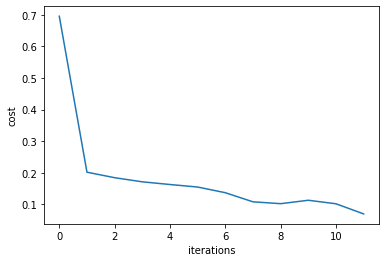

In [7]:
learning_rate = 0.3
num_iterations = 20000 + 1
layers_dims = [train_X.shape[0], 100, 10, 1]
parameters = model(train_X, train_Y, layers_dims, learning_rate, num_iterations)

Accuracy of the model on Train dataset is :  98.58 %
Accuracy of the model on Test dataset is :  93.5 %


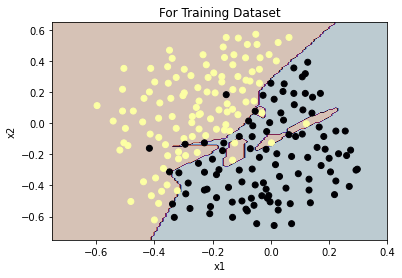

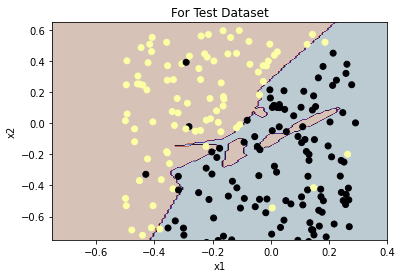

In [8]:
accuracy(train_X, train_Y, parameters, "Train")
accuracy(test_X, test_Y, parameters, "Test")

plt.title("For Training Dataset")
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

plt.title("For Test Dataset")
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), test_X, test_Y)

# Dropout

## Forward Propagation
For every i in hidden layers

$D_i = np.random.rand(A_i.shape[0], A_i.shape[1]) $               
$D_i = D_i < keep\_rate                          $  
$A_i = A_i * D_i                               $    
$A_i = A_i / keep\_rate                     $


## Backward Propagation
For every i in hidden layers

$dA_i = dA_i * D_i    $          
$dA_i = dA_i / keep\_rate$

In [10]:
def forward_propagation_with_dropout(X, parameters, keep_rate):
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    W3 = parameters["W3"]
    b3 = parameters["b3"]
    
    Z1 = np.dot(W1, X) + b1
    A1 = relu(Z1)
    
    D1 = np.random.rand(A1.shape[0], A1.shape[1])
    D1 = D1 < keep_rate
    A1 = A1 * D1
    A1 = A1/keep_rate
        
    Z2 = np.dot(W2, A1) + b2
    A2 = relu(Z2)
    
    D2 = np.random.rand(A2.shape[0], A2.shape[1])
    D2 = D2 < keep_rate
    A2 = A2 * D2
    A2 = A2/keep_rate
    
    Z3 = np.dot(W3, A2) + b3
    A3 = sigmoid(Z3)
    
    cache = (Z1, A1, D1, W1, b1, Z2, A2, D2, W2, b2, Z3, A3, W3, b3)
    
    return A3, cache


In [11]:
def backward_propagation_with_dropout(X, Y, cache, keep_rate):
    
    m = X.shape[1]
    (Z1, A1, D1, W1, b1, Z2, A2, D2, W2, b2, Z3, A3, W3, b3) = cache
    
    dZ3 = A3 - Y
    dW3 = 1./m * np.dot(dZ3, A2.T)
    db3 = 1./m * np.sum(dZ3, axis=1, keepdims = True)
    
    dA2 = np.dot(W3.T, dZ3)
    
    dA2 = dA2 * D2
    dA2 = dA2 / keep_rate
    
    dZ2 = np.multiply(dA2, np.int64(A2 > 0))
    dW2 = 1./m * np.dot(dZ2, A1.T)
    db2 = 1./m * np.sum(dZ2, axis=1, keepdims = True)
    
    dA1 = np.dot(W2.T, dZ2)
    
    
    dA1 = dA1 * D1
    dA1 = dA1 / keep_rate
    
    dZ1 = np.multiply(dA1, np.int64(A1 > 0))
    dW1 = 1./m * np.dot(dZ1, X.T)
    db1 = 1./m * np.sum(dZ1, axis=1, keepdims = True)
    
    gradients = {"dZ3": dZ3, "dW3": dW3, "db3": db3,
                 "dA2": dA2, "dZ2": dZ2, "dW2": dW2, "db2": db2,
                 "dA1": dA1, "dZ1": dZ1, "dW1": dW1, "db1": db1}
    
    return gradients

In [14]:
def model_with_dropout(X, Y, layers_dims, learning_rate = 0.3, num_iterations = 30000 , keep_rate = 0.85):

    grads = {}
    cost_list = []                            
    m = X.shape[1]                        
    
    parameters = initialize_parameters(layers_dims)

    for i in range(0, num_iterations):

        a3, cache = forward_propagation_with_dropout(X, parameters, keep_rate)
    
        cost = cost_function(a3, Y)

        grads = backward_propagation_with_dropout(X, Y, cache, keep_rate)
        
        parameters = update_parameters(parameters, grads, learning_rate)
        
        if (i%1000 == 0):
            print("Cost after iteration ", i, " is : ", cost)
            cost_list.append(cost)
    
    # plot the cost
    plt.plot(cost_list)
    plt.ylabel('cost')
    plt.xlabel('iterations')
    plt.show()
    
    return parameters

Cost after iteration  0  is :  0.6962749897505071
Cost after iteration  1000  is :  0.25942838505144816
Cost after iteration  2000  is :  0.2738160976443098
Cost after iteration  3000  is :  0.1987862698829549
Cost after iteration  4000  is :  0.21239197889225275
Cost after iteration  5000  is :  nan
Cost after iteration  6000  is :  nan
Cost after iteration  7000  is :  nan
Cost after iteration  8000  is :  nan
Cost after iteration  9000  is :  nan
Cost after iteration  10000  is :  nan
Cost after iteration  11000  is :  nan
Cost after iteration  12000  is :  nan
Cost after iteration  13000  is :  nan
Cost after iteration  14000  is :  nan
Cost after iteration  15000  is :  nan
Cost after iteration  16000  is :  nan
Cost after iteration  17000  is :  nan
Cost after iteration  18000  is :  nan
Cost after iteration  19000  is :  nan
Cost after iteration  20000  is :  nan


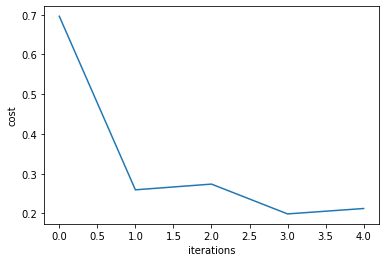

In [24]:
learning_rate = 0.3
num_iterations = 20000 + 1
layers_dims = [train_X.shape[0], 100, 10, 1]
parameters = model_with_dropout(train_X, train_Y, layers_dims, learning_rate, num_iterations, keep_rate = 0.6)

Accuracy of the model on Train dataset is :  95.26 %
Accuracy of the model on Test dataset is :  94.5 %


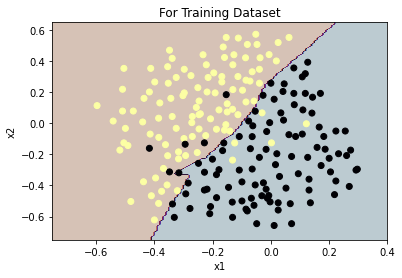

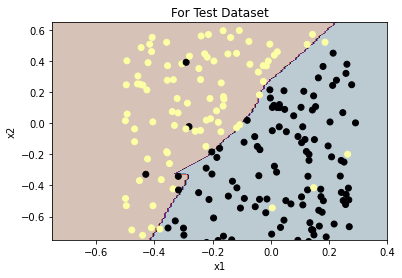

In [25]:
accuracy(train_X, train_Y, parameters, "Train")
accuracy(test_X, test_Y, parameters, "Test")

plt.title("For Training Dataset")
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

plt.title("For Test Dataset")
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), test_X, test_Y)